### All genes are assumed by binary coding

object function is 
$$
f(x) = xsin(10\pi x) + 1.0, \;\; \text{where } x\in [-1, 2]
$$

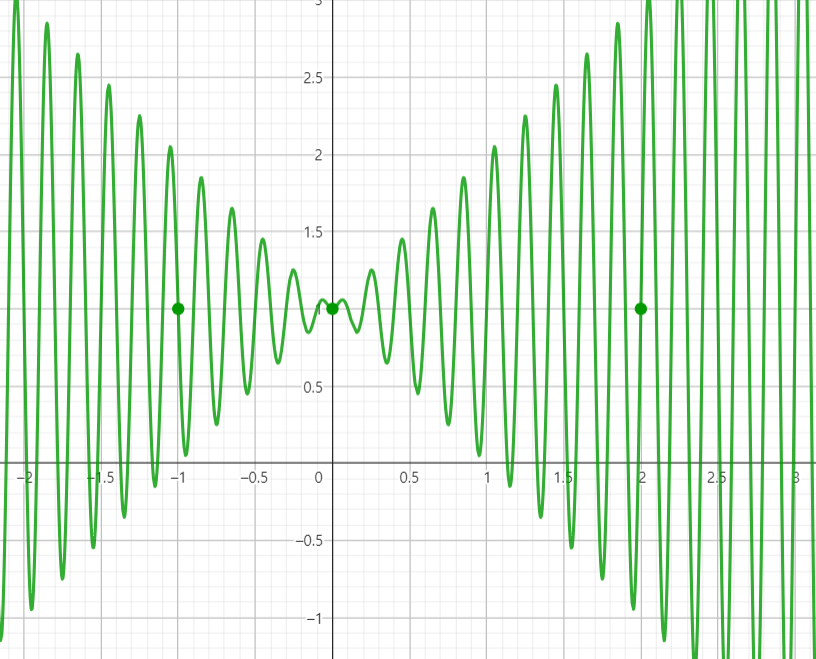

### 1-(a) Find the value of gene $v$ = (1000101110110101000111)

In [1]:
v = "1000101110110101000111"

#### Encoding
Decimal number to Binary number

In [2]:
def encoding(gene):
    return int(gene, 2)

In [3]:
print(encoding(v))

2288967


#### Decoding
Binary number to Decimal number

Use the following formula
$$
X = X_{lb} + \frac{X_{ub} - X_{lb}}{2^{22} - 1} \cdot d(s)
$$


$d(s)$ is a decimal value of s

In [4]:
def decoding(gene):
    gene_to_int = encoding(gene)
    return -1 + 3 * (gene_to_int / (2 ** len(gene) - 1))

In [5]:
X = decoding(v)
print(X)

0.6371971695893213


### 1-(b) Find the fitness for the following three genes

$$
v_1 = (1000101110110101000111)\\
v_2 = (0000001110000000010000)\\
v_3 = (1110000000111111000101)
$$

In [6]:
v_1 = "1000101110110101000111"
v_2 = "0000001110000000010000"
v_3 = "1110000000111111000101"

In [7]:
import numpy as np

In [8]:
def obj_func(x):
    return x * np.sin(10 * np.pi * x) + 1.0

In [9]:
def fitness(v):
    x = decoding(v)
    return obj_func(x)

In [10]:
print("fitness of v_1 : ", fitness(v_1))
print("fitness of v_2 : ", fitness(v_2))
print("fitness of v_3 : ", fitness(v_3))

fitness of v_1 :  1.5863469511312898
fitness of v_2 :  0.07887708978928076
fitness of v_3 :  2.2506542472047126


### 1-(c) Implement GA Algorithm

population size (pop_size) = 50, cross over prob ($p_c$) = 0.25, mutation prob ($p_m$) = 0.01
Find maximum value of the objective func and corresponding gene

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Parameters

pop_size = 50
p_c = 0.25
p_m = 0.01
max_gen = 150
gene_length = 22

In [13]:
def initial_population(pop_size, gene_length):
    return np.random.randint(2, size=(pop_size, gene_length))

In [14]:
def decode(gene):
    gene_to_int = int("".join(gene.astype(str)), 2)
    return -1 + 3 * (gene_to_int / (2 ** len(gene) - 1))

In [15]:
# Calculate fitness

def calculate_fitness(population):
    decoded_values = np.array([decode(individual) for individual in population])
    fitness_values = obj_func(decoded_values)
    return fitness_values

In [16]:
# Roulette wheel selection

def select(population, fitness):
    # Ensure fitness values are non-negative by normalizing if necessary
    min_fitness = np.min(fitness)
    if min_fitness < 0:
        fitness = fitness - min_fitness + 1
    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

In [17]:
# Crossover
def crossover(parent1, parent2, p_c):
    if np.random.rand() < p_c:
        point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

In [18]:
# Mutation
def mutate(gene, p_m):
    for i in range(len(gene)):
        if np.random.rand() < p_m:
            gene[i] = 1 - gene[i]
    return gene

In [19]:
# GA

def genetic_algorithm(pop_size, gene_length, p_c, p_m, generations):
    population = initial_population(pop_size, gene_length)
    best_gene = None
    best_fitness = -np.inf
    log = []

    for generation in range(generations):
        fitness = calculate_fitness(population)
        
        if np.max(fitness) > best_fitness:
            best_fitness = np.max(fitness)
            best_gene = population[np.argmax(fitness)]
        
        best_x = decode(best_gene)
        log.append((generation, best_x, best_fitness))
        
        selected_population = select(population, fitness)
        next_population = []
        
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1, child2 = crossover(parent1, parent2, p_c)
            next_population.append(mutate(child1, p_m))
            next_population.append(mutate(child2, p_m))
        
        population = np.array(next_population)
    
    return best_gene, best_fitness, log

Best gene: 1111001100111110101100
Corresponding x value: 1.8505265356365523
Maximum fitness : 2.850273366532835


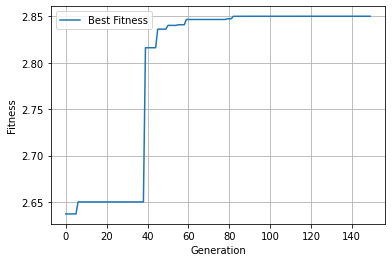

In [20]:
best_gene, best_fitness, log = genetic_algorithm(pop_size, gene_length, p_c, p_m, max_gen)

# Results
best_x = decode(best_gene)

print(f"Best gene: {''.join(best_gene.astype(str))}")
print(f"Corresponding x value: {best_x}")
print(f"Maximum fitness : {best_fitness}")

# Plot the results
generations, best_x_values, best_fitness_values = zip(*log)
plt.plot(generations, best_fitness_values, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()

## 2.

### Obj_func
$$
f(x_1, x_2) = 21.5 + x_1 sin(4\pi x_1) + x_2 sin(20\pi x_2), \\
\\
\text{where } -3.0 \leq x_1\leq 12.1 \;\text{and } 4.1 \leq x_2 \leq 5.8
$$

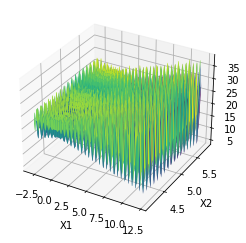

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Objective function
def objective_function(x1, x2):
    return 21.5 + x1 * np.sin(4 * np.pi * x1) + x2 * np.sin(20 * np.pi * x2)

# Define ranges for x1 and x2
x1_range = np.linspace(-3.0, 12.1, 400)
x2_range = np.linspace(4.1, 5.8, 400)

# Create a meshgrid
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = objective_function(X1, X2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()


### 2-(a) set precision $\Delta = 0.0001$, find length of gene $x_1$ and $x_2$

$x_1 = 12.1 - (-3.0) = 15.1$

$\frac{15.1}{0.0001} = 151000$


$log_2(151000) \approx 17.2 \to 18$

In [22]:
x1 = np.log2(151000)
x1

17.204189023987166

$x_2 = 5.8 - 4.1 = 1.7$

$\frac{1.7}{0.0001} = 17000$

In [23]:
x2 = np.log2(17000)
x2

14.053247125912426

$log_2 (17000) \approx 14.05 \to 15$

Therefore, the lenghts of $x_1$ and $x_2$ are 18, 15

### 2-(b) 

Find the values of $x_1$ and $x_2$ for v and verify they are valid values within the range
<br>
gene $v$ = ($x_1$ concat $x_2$) = (010001001011010000111110010100010)

In [24]:
v ="010001001011010000111110010100010"
print(len(v))

33


In [25]:
x1 = v[:18]
x2 = v[18:]
print(x1)
print(x2)

010001001011010000
111110010100010


In [26]:
x1_min, x1_max = -3.0, 12.1
x2_min, x2_max = 4.1, 5.8

x1_range = x1_max - x1_min
x2_range = x2_max - x2_min

x1 = x1_min + (x1_range / (2**18 - 1)) * int(x1, 2)
x2 = x2_min + (x2_range / (2**18 - 1)) * int(x2, 2)

print("x1 : ", x1)
print("x2 : ", x2)
print("x1 in x1 range : ", x1_min <= x1 <= x1_max)
print("x2 in x2 range : ", x2_min <= x2 <= x2_max)

x1 :  1.0524263474515818
x2 :  4.306910731928756
x1 in x1 range :  True
x2 in x2 range :  True


### 2-(c) Implement GA Algorithm

population size (pop_size) = 20, cross over prob ($p_c$) = 0.25, mutation prob ($p_m$) = 0.01
Find maximum value of the objective func and corresponding gene

In [27]:
def obj_func(x1, x2):
    return 21.5 + x1 * np.sin(4 * np.pi * x1) + x2 * np.sin(20 * np.pi * x2)

In [28]:
# Initial population
def initialize_population(pop_size, gene_length):
    return np.random.randint(2, size=(pop_size, gene_length))

# Decoding function
def decode(gene, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max):
    x1_binary = gene[:x1_length]
    x2_binary = gene[x1_length:]
    
    x1_decimal = int("".join(x1_binary.astype(str)), 2)
    x2_decimal = int("".join(x2_binary.astype(str)), 2)
    
    x1 = x1_min + (x1_max - x1_min) * x1_decimal / (2**x1_length - 1)
    x2 = x2_min + (x2_max - x2_min) * x2_decimal / (2**x2_length - 1)
    
    return x1, x2

# Fitness calculation
def calculate_fitness(population, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max):
    fitness_values = []
    for individual in population:
        x1, x2 = decode(individual, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max)
        fitness_values.append(objective_function(x1, x2))
    return np.array(fitness_values)

# Selection using roulette wheel
def select(population, fitness):
    min_fitness = np.min(fitness)
    if min_fitness < 0:
        fitness = fitness - min_fitness + 1
    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

# Crossover
def crossover(parent1, parent2, pc):
    if np.random.rand() < pc:
        point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

# Mutation
def mutate(gene, pm):
    for i in range(len(gene)):
        if np.random.rand() < pm:
            gene[i] = 1 - gene[i]
    return gene

Best gene: 110111100011101110110101110101010
Best gene x1 : 110111100011101110
Best gene x2 : 110101110101010
Corresponding x1 value: 10.10829051319318
Corresponding x2 value: 5.529956968901638
Maximum fitness : 36.6501704481315


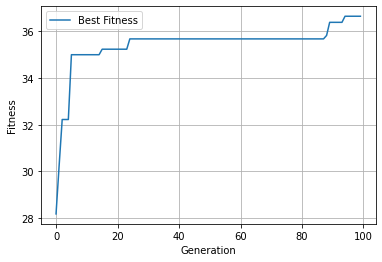

In [29]:
# Genetic Algorithm
def genetic_algorithm(pop_size, gene_length, x1_length, x2_length, pc, pm, generations, x1_min, x1_max, x2_min, x2_max):
    population = initialize_population(pop_size, gene_length)
    best_gene = None
    best_fitness = -np.inf
    log = []

    for generation in range(generations):
        fitness = calculate_fitness(population, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max)
        
        if np.max(fitness) > best_fitness:
            best_fitness = np.max(fitness)
            best_gene = population[np.argmax(fitness)]
        
        best_x1, best_x2 = decode(best_gene, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max)
        log.append((generation, best_x1, best_x2, best_fitness))
        
        selected_population = select(population, fitness)
        next_population = []
        
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1, child2 = crossover(parent1, parent2, pc)
            next_population.append(mutate(child1, pm))
            next_population.append(mutate(child2, pm))
        
        population = np.array(next_population)
    
    return best_gene, best_fitness, log

# Parameters
pop_size = 20
x1_length = 18
x2_length = 15
gene_length = x1_length + x2_length
pc = 0.25
pm = 0.01
generations = 100

x1_min, x1_max = -3.0, 12.1
x2_min, x2_max = 4.1, 5.8

# Run Genetic Algorithm
best_gene, best_fitness, log = genetic_algorithm(pop_size, gene_length, x1_length, x2_length, pc, pm, generations, x1_min, x1_max, x2_min, x2_max)

# Results
best_x1, best_x2 = decode(best_gene, x1_length, x2_length, x1_min, x1_max, x2_min, x2_max)

# Print the best gene and its fitness
print(f"Best gene: {''.join(best_gene.astype(str))}")
print(f"Best gene x1 : {''.join(best_gene[:x1_length].astype(str))}")
print(f"Best gene x2 : {''.join(best_gene[x1_length:].astype(str))}")
print(f"Corresponding x1 value: {best_x1}")
print(f"Corresponding x2 value: {best_x2}")
print(f"Maximum fitness : {best_fitness}")

# Plot the results
generations, best_x1_values, best_x2_values, best_fitness_values = zip(*log)
plt.plot(generations, best_fitness_values, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()